# Importing Pandas and the csv file

In [2]:
import pandas as pd
file_path = "orders copy.csv"  
df = pd.read_csv(file_path)

# Preview the first few rows
df.head()

,order_id,customer_id,restaurant_id,order_item,order_date,order_time,order_status,total_amount
0,658,9,54,Pasta Alfredo,2023-08-16,23:59:58,Completed,314.0
1,111,11,15,Chicken Biryani,2023-03-03,23:59:48,Completed,411.0
2,8481,5,8,Masala Dosa,2023-08-05,23:59:48,Completed,200.0
3,4634,17,58,Chicken Shawarma,2023-03-08,23:59:42,Completed,259.0
4,8699,7,22,Samosa,2023-11-28,23:59:39,Completed,201.0


# Exploratory Data Analysis

In [3]:
# Basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       10000 non-null  int64  
 1   customer_id    10000 non-null  int64  
 2   restaurant_id  10000 non-null  int64  
 3   order_item     10000 non-null  object 
 4   order_date     10000 non-null  object 
 5   order_time     10000 non-null  object 
 6   order_status   10000 non-null  object 
 7   total_amount   10000 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 625.1+ KB


In [4]:
# Check for unique number of values.
df.nunique()

order_id         10000
customer_id         24
restaurant_id       61
order_item          23
order_date         390
order_time        9286
order_status         2
total_amount       531
dtype: int64

In [5]:
# Check for duplicated rows.
df.duplicated().sum()


0

In [6]:
# Check for null values
df.isnull().sum()


order_id         0
customer_id      0
restaurant_id    0
order_item       0
order_date       0
order_time       0
order_status     0
total_amount     0
dtype: int64

In [7]:
df['order_status'].value_counts()


order_status
Completed        9750
Not Fulfilled     250
Name: count, dtype: int64

In [8]:
df['order_item'].value_counts().head(10)


order_item
Chicken Biryani         754
Paneer Butter Masala    751
Pasta Alfredo           729
Masala Dosa             728
Mutton Rogan Josh       718
Vegetable Fried Rice    470
Hyderabadi Biryani      450
Dal Makhani             446
Mutton Biryani          430
Burger                  428
Name: count, dtype: int64

In [9]:
df['total_amount'].describe()

#Most customers spent around ₹250–₹340.
#But some expensive outlier orders raised the average bill (mean) to ₹322.
#This is common in real-world billing data.

count    10000.000000
mean       322.821600
std        112.242695
min        199.000000
25%        246.000000
50%        295.000000
75%        343.000000
max        750.000000
Name: total_amount, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice theme
sns.set(style='whitegrid', palette='Set2')


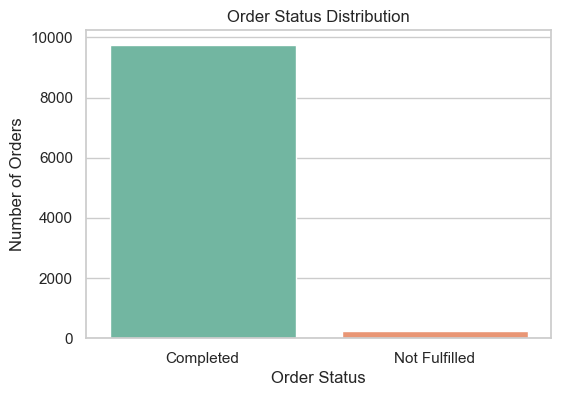

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='order_status')
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.show()


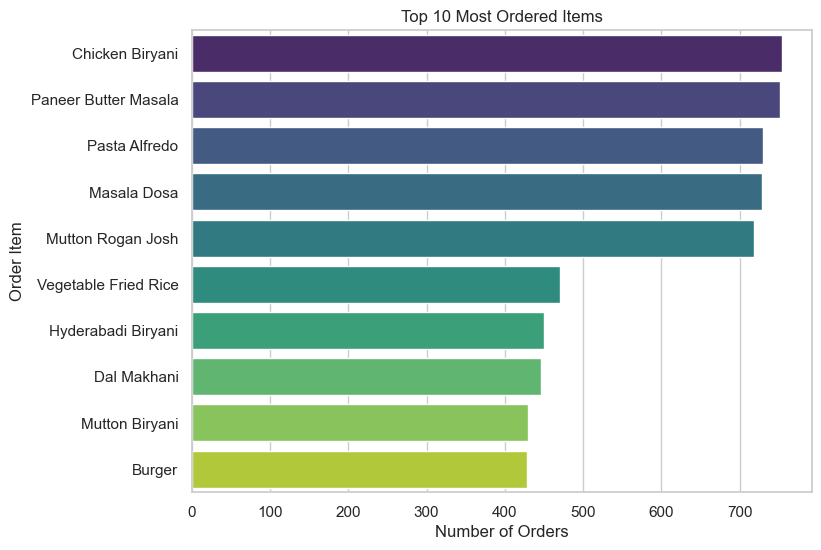

In [12]:
top_items = df['order_item'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title("Top 10 Most Ordered Items")
plt.xlabel("Number of Orders")
plt.ylabel("Order Item")
plt.show()


/Users/arjunanandkaralkar/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


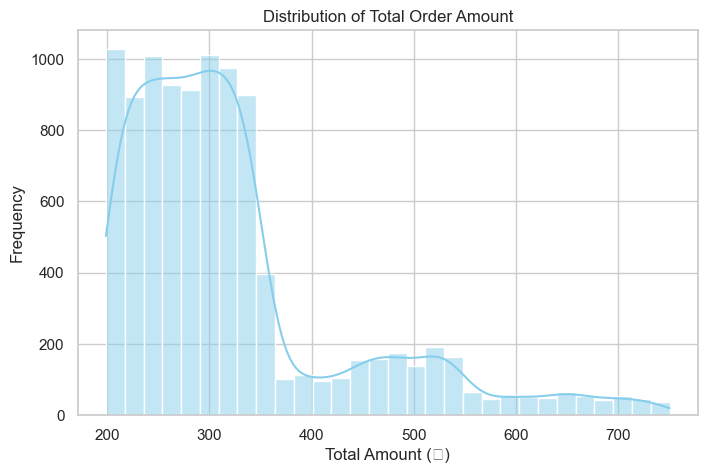

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_amount'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Order Amount")
plt.xlabel("Total Amount (₹)")
plt.ylabel("Frequency")
plt.show()


/var/folders/q4/j2h7vhds419_plw4p58xbhbm0000gn/T/ipykernel_54917/2628389469.py:16: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  plt.tight_layout()
/Users/arjunanandkaralkar/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


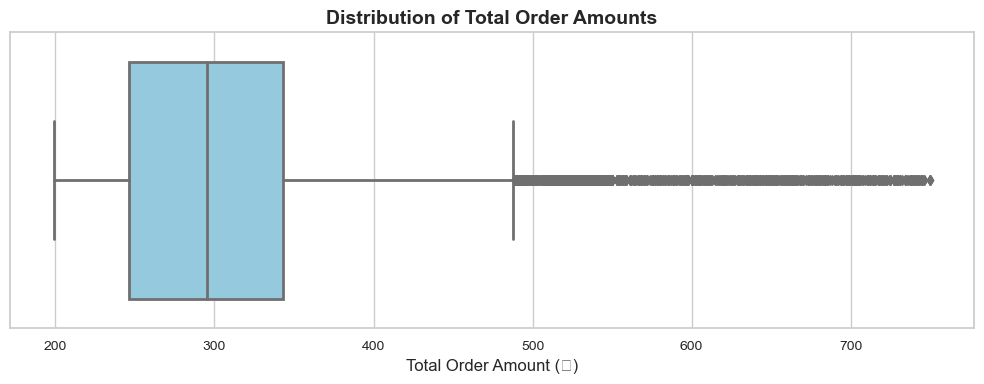

In [15]:
plt.figure(figsize=(10, 4))  # Wider figure for clarity
sns.set_style("whitegrid")  # Clean background with grid

# Draw boxplot with color and line width adjustments
sns.boxplot(
    x=df['total_amount'], 
    color='skyblue', 
    linewidth=2
)

# Add better labels and title
plt.xlabel("Total Order Amount (₹)", fontsize=12)
plt.title("Distribution of Total Order Amounts", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks([])  # No need for y-axis ticks on a horizontal boxplot
plt.tight_layout()
plt.show()